<a href="https://colab.research.google.com/github/datametrologyworld/hello-world/blob/main/pandasSampler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas Sampler Notebook

Execute the code below to get a sense for Pandas.  Code should be executed sequentially.

##Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

##Create a Dataframe
This creates a randomly generated dataframe starting in 1/1/2017 and represents daily data until the current day minus a day.

In [ ]:
dfunits = pd.DataFrame(np.random.randint(low=25, high=25000, size=1513),
                       columns=['Units'],
                       index=pd.date_range(start='2017-01-01', end = dt.date.today()-dt.timedelta(days=1), freq='D'))

Review the contents of the dataframe by executing the code below.

In [ ]:
dfunits.head()

,Units
2017-01-01,11660
2017-01-02,21139
2017-01-03,15604
2017-01-04,16520
2017-01-05,22608


Review the statistics of the dataframe.

In [ ]:
dfunits.describe()

,Units
count,1513.000000
mean,12426.619299
std,7202.061019
min,41.000000
25%,6109.000000
50%,12458.000000
75%,18727.000000
max,24986.000000


## Exploratory

Upsample the daily time dimension to months and find the monthly totals for Units.

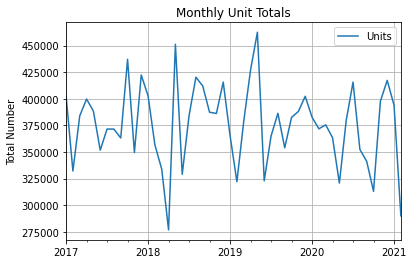

In [ ]:
units = dfunits.resample('M').sum()
units.plot(grid=True)
plt.title('Monthly Unit Totals')
plt.ylabel('Total Number')
plt.show()

Find the total number of units for one month (April 2018) by executing the code below.

In [ ]:
units.loc['2018-04', 'Units'].sum()

276758

Zoom in on March 2020 and plot the daily unit totals.

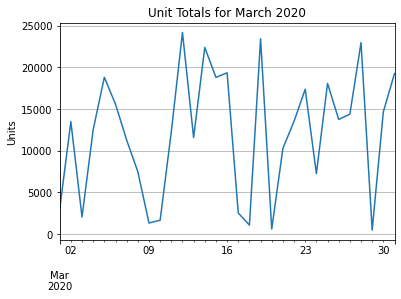

In [ ]:
march = dfunits.loc['2020-03-01':'2020-03-31', 'Units']
march.plot(grid = True)
plt.title('Unit Totals for March 2020')
plt.ylabel('Units')
plt.show()

Zoom in on March 1st - March 15th 2020 and extract the Units.  Apply a rolling mean with a window set to 3.  (3 observations used to calculate the mean).

In [ ]:
original = dfunits.loc['2020-03-01':'2020-03-15', 'Units']
rollavg = original.rolling(window=3).mean()

Executing the code below stores the original units and the rolling mean to a dataframe and produces a plot of the data.

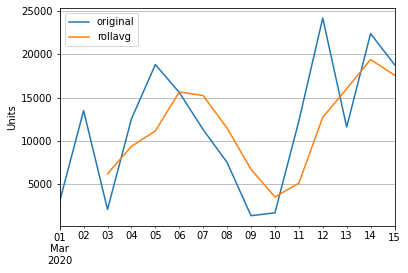

In [ ]:
impact = pd.DataFrame({'original':original, 'rollavg':rollavg})
impact.plot(grid=True)
plt.ylabel('Units')
plt.show()

Find the median number of units between March and June 2020.

In [ ]:
print(dfunits.loc['2020-Mar':'2020-Jun', 'Units'].median())

12401.0
